IMPORT MODULES

In [26]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 


LOAD HAND DIGITS FROM KERAS

In [27]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

PRINT HOW MANY DATA AND ARRAY OF A IMAGE

In [28]:
len(x_train)


60000

In [29]:
len(x_test)

10000

In [30]:
x_train[0].shape

(28, 28)

In [31]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

PLOT IT TO EXPLICITLY PREDICT IT

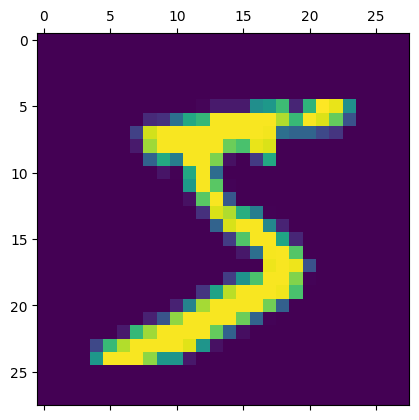

In [32]:
plt.matshow(x_train[0])

CHECK Y TRAIN TO MATCH IT

In [33]:
y_train[0]

5

NOW OUR TASK IS TO FLATTEN THE ARRAY TO FEED A NEURAL NETWORK

Without Scaling the accuracy was very low so we need to convert all the values 0 to 255 in 0 to 1

In [34]:
x_train = x_train/255
x_test = x_test/255

In [35]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_train_flatten.shape
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

NOW WE NEED TO MAKE THE INPUT LAYERS AND OUTPUT LAYERS USING KERAS

In [36]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid'),
])



EVERY TIME YOU NEED TO COMPILE THE MODEL IN KERAS AND PASS A LOTS OF ARGUMENTS
ADAM HERE FOR FEED THEM EFFICIENTLY AND SPARSE_CATEGORICAL_CROSSENTROPY FOR ONE HOT ENCODDING OUTPUT IN OUTPUT LAYER

In [37]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

model.fit(x_train_flatten,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4671 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2667 - accuracy: 0.9256


NOW WE WANT TO TEST FIRST TEST DATA

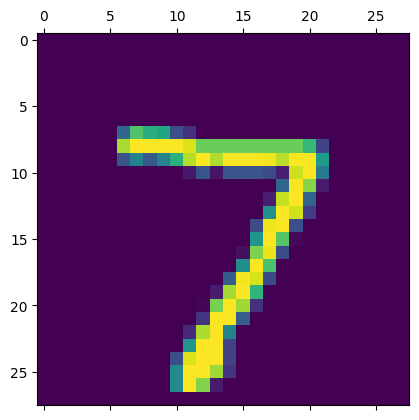

In [39]:
x_test_flatten = x_test.reshape(len(x_test),28*28)
plt.matshow(x_test[0])

In [42]:
y_pred = model.predict(x_test_flatten)
y_pred[0]
np.argmax(y_pred[0])

313/313 [==============================] - 0s 1ms/step


7

CONFUSION MATRIX

In [43]:
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    6,    5,    3,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   9,    9,  914,   23,    7,    3,   13,   11,   37,    6],
       [   4,    0,   16,  920,    0,   32,    3,   11,   15,    9],
       [   2,    1,    4,    1,  899,    0,   14,    5,    8,   48],
       [   9,    2,    1,   25,    6,  800,   13,    5,   24,    7],
       [  13,    3,    3,    2,    7,   12,  915,    2,    1,    0],
       [   1,    5,   23,    6,    6,    1,    0,  949,    2,   35],
       [  12,    7,    8,   25,    9,   46,    9,   12,  832,   14],
       [  11,    7,    1,    9,   20,    8,    0,   21,    4,  928]])>

FOR VISUALISING INSTEAD OF MATPLOTLIB WE CAN USE SEABORN

Text(95.72222222222221, 0.5, 'Truth')

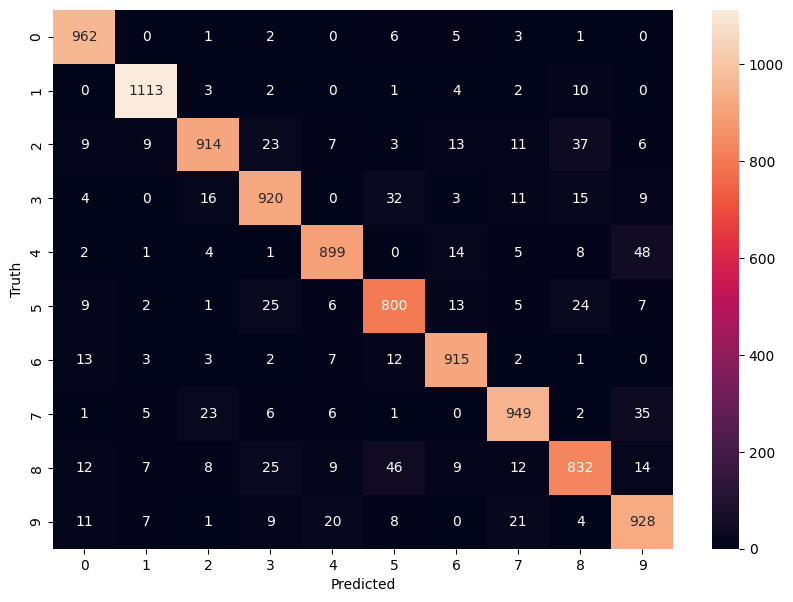

In [44]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

WE CAN ADD HIDDEN LAYER TO IMPROVE PERFORMANCE

In [45]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

model.fit(x_train_flatten,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2700 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1206 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0648 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0509 - accuracy: 0.9845


In [49]:
y_pred = model.predict(x_test_flatten)
np.argmax(y_pred[0])

313/313 [==============================] - 1s 2ms/step


7

In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

Text(95.72222222222221, 0.5, 'Truth')

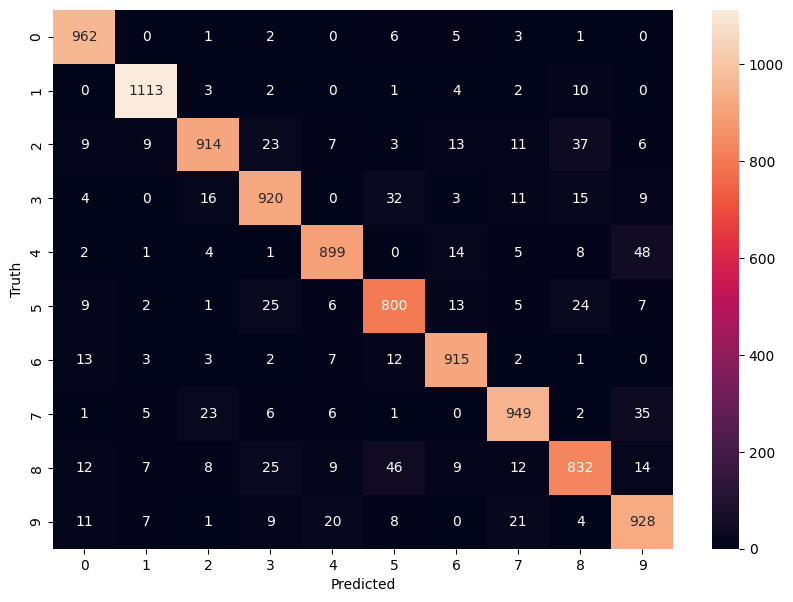

In [50]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [51]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9750


[0.08269831538200378, 0.9750000238418579]